# SoundVision 👁️
##### My Github:ARSALANnam(Echolyno)
##### My Email: arsalannam9710@gmail.com
##### My Linkedin:www.linkedin.com/in/arsalannam

## This project is a Music Genre Classifier built with Deep Learning (Keras & TensorFlow) using the features_3_sec.csv dataset (extracted from the GTZAN dataset). The model achieves around 91% accuracy on the test set.

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

2025-10-19 10:26:12.397944: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-19 10:26:12.440176: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-19 10:26:13.420900: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


import pandas : Used for loading and manipulating datasets (CSV, DataFrames).

import numpy : Provides numerical operations and array handling.

import matplotlib.pyplot : For plotting graphs (e.g., accuracy/loss curves).

import seaborn : For advanced visualization (e.g., heatmap of the confusion matrix).

from sklearn.metrics import confusion_matrix : To compute the confusion matrix for evaluation.

from sklearn.model_selection import train_test_split : To split the dataset into training and testing sets.

from sklearn.preprocessing import LabelEncode : Converts categorical labels (genres) into numeric values.

from sklearn.preprocessing import StandardScaler : Normalizes/standardizes feature values for better training.

## Read CSV

In [6]:
df = pd.read_csv("features_3_sec.csv")

# preprocessing

In [7]:
X = df.drop(columns=["filename", "length", "label"])
y = df["label"]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y) 

# Train, Test, Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Definition

In [54]:
model = Sequential([
    Dense(1024, activation="relu", input_shape=(X.shape[1],)),
    Dropout(0.5), 
    
    Dense(512, activation="relu"),
    Dropout(0.5),
    
    Dense(256, activation="relu"),
    Dropout(0.5),
    
    Dense(128, activation="relu"),
    Dropout(0.5),
    
    Dense(y.shape[1], activation="softmax")
])

## Compile

In [55]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fit

In [56]:
history = model.fit(X_train, y_train, epochs=100, batch_size=189, validation_split=0.2, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.2528 - loss: 2.0497 - val_accuracy: 0.4503 - val_loss: 1.5679
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4092 - loss: 1.6262 - val_accuracy: 0.5629 - val_loss: 1.2895
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4980 - loss: 1.4075 - val_accuracy: 0.6417 - val_loss: 1.1152
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5680 - loss: 1.2474 - val_accuracy: 0.6917 - val_loss: 0.9629
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6132 - loss: 1.1311 - val_accuracy: 0.7111 - val_loss: 0.8741
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ -0s -2511us/step - accuracy: 0.6576 - loss: 1.0114 - val_accuracy: 0.7430 - val_loss: 0.7828
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6848 - loss: 0.9476 - val_accuracy: 0.7567 - val_loss: 0.7375
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7044 - loss: 0.8915 - val_accurac

# Model Evaluate

In [60]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", acc)
print(loss)

Test Accuracy: 0.9159159064292908
0.3279601037502289


# Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


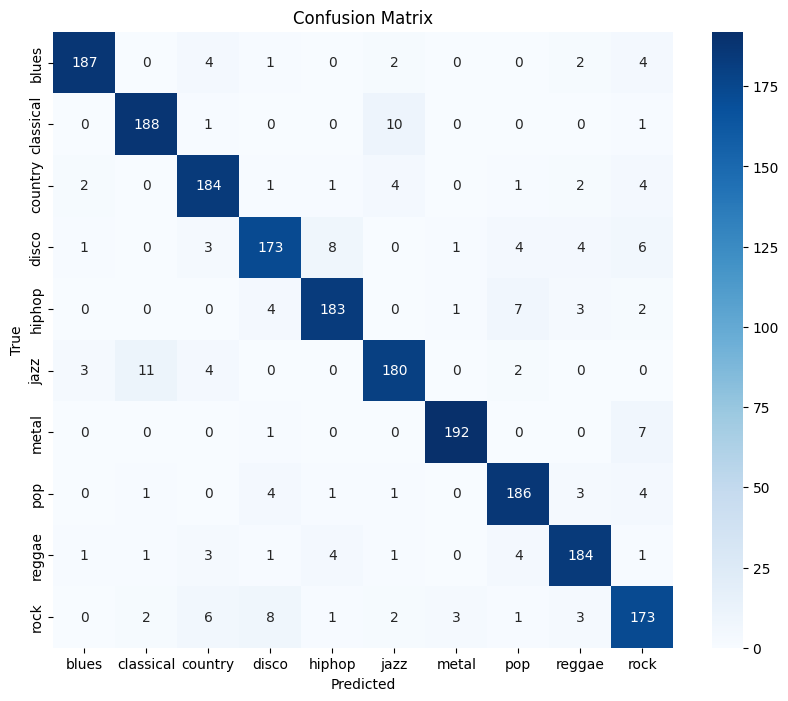

In [61]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy & Loss

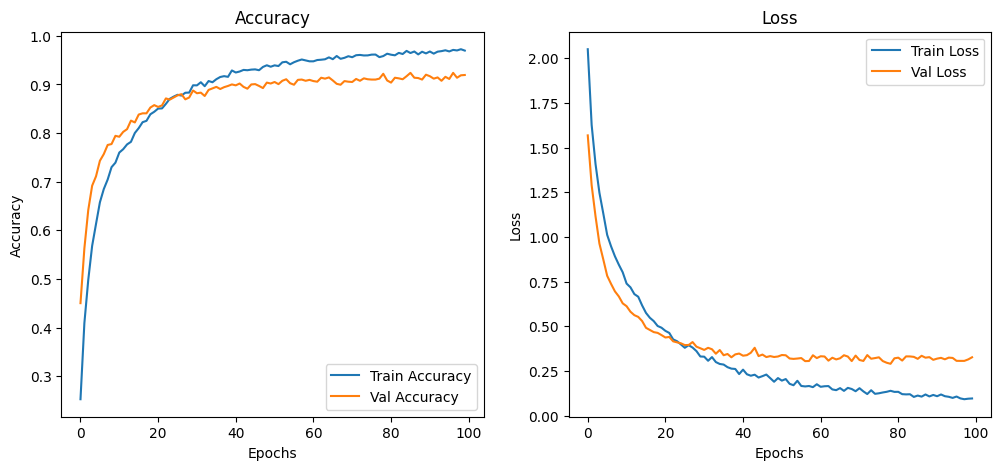

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Thank you for your Support 🤗